In [1]:
import pandas as pd
import numpy as np

# 2.2 Data Preparation

In [2]:
#url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'
#!wget $url

In [3]:
df = pd.read_csv('car-price.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# Selecting object columns
str = list(df.dtypes[df.dtypes == 'object'].index)
str

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Save the object columns into string to standardize it values automatically later.

In [10]:
# Standardize all values in str using for loop
for col in str:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory Data Analysis

In [12]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [13]:
# Checking all columns and its values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

**Looking at the Distribution of Price**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

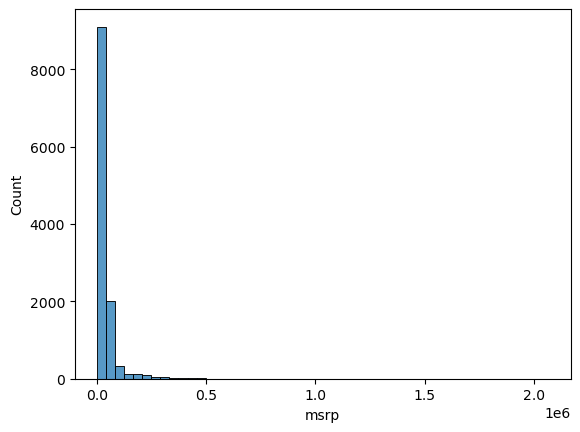

In [15]:
sns.histplot(df.msrp, bins=50)

le6 = $10^6$. That is 1.000.000

The type of distribution above is called "Long Tail Distribution", because of the long flat distribution. This kind of distribution is not good as a training materials for machine learning, so we need to remove those 'tail'.

<Axes: xlabel='msrp', ylabel='Count'>

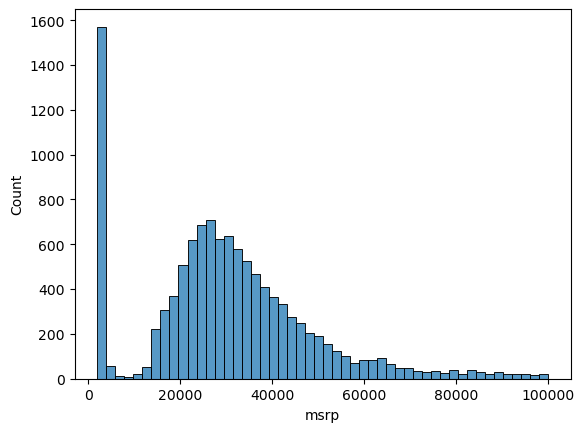

In [16]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [17]:
# Normalize the data using logarithm
price_log = np.log1p(df.msrp)

In [18]:
price_log

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

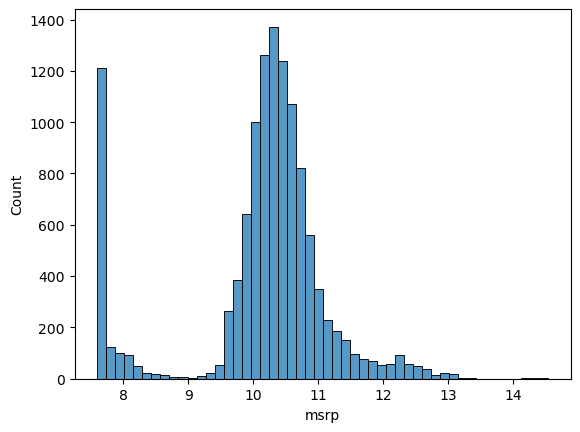

In [19]:
sns.histplot(price_log, bins=50)

Now, the distribution looks more compact. It now looked like normal distribution because of the curve in the middle. Now, this is a good materials as a target variable for the model training.

**Checking the Missing Values**

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting Up the Validation Framework

The data will be splitted into 60% of training data, 20% of validation data, and 20% of test data.

In [21]:
# Checking the size of data
n = len(df)

n_test = int(n * 0.2)
print('size of test data: ', n_test)

n_val = int(n * 0.2)
print('size of validation data: ', n_val)

n_train = n - n_val - n_test
print('size of training data: ', n_train)

print('total size of data: ', n, n_val + n_test + n_train)

size of test data:  2382
size of validation data:  2382
size of training data:  7150
total size of data:  11914 11914


In [22]:
# Splitting the data
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [23]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [24]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [25]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


There is a problem right there. The data is splitted sequentially, so, each data split is containing small variance of data. We need to shuffle it.

In [26]:
# Generate the sequence a number from 1 to n
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [27]:
# Perform the shuffle task
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [28]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [30]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [31]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [32]:
print('len of df_train: ', len(df_train))
print('len of df_val: ', len(df_val))
print('len of df_test: ', len(df_test))

len of df_train:  7150
len of df_val:  2382
len of df_test:  2382


We actually doesn't need the information about the number of index. So, we need to delete it with reset index method.

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


Now, we need to transform the target variable and separate it from the features variables.

In [35]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [36]:
print(y_train)
print(len(y_train))

[ 9.57574708  9.887663    9.89323518 ... 10.45380308 12.62248099
 10.54061978]
7150


In [37]:
print(y_val)
print(len(y_val))

[10.19936098 10.90872279  9.72770457 ... 11.21756062  9.77542688
 10.1924563 ]
2382


In [38]:
print(y_test)
print(len(y_test))

[ 7.60140233  8.07464908 10.34563811 ... 10.27852782 10.00789261
 10.40414162]
2382


In [39]:
# Delete the target variables from features matrix
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.5 Linear Regression

The formula for this task is $g(X) = y$. Where $g$ is the model, $(X)$ is feature matrix, and $y$ is target matrix.

The simplified version is $g(x_i) = y_i$. Where $x_i$ is a car, and $y_i$ is it's price.

For this training, we will take the column of engine_hp, city_mpg, and popularity as a features.

In [40]:
# For demonstration, we will use 10 row of df_train
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [41]:
xi = [453, 11, 86]

In [42]:
# Define the weights
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [43]:
# Define the lr (simple one)
def lr(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

How the model works is:
$g(x_i) = w_0 + w_1 . x_1 + w_2 . x_2 + w_3 . x_3$

$w_0$ is bias, $x_1$ is engine_hp, $x_2$ is city_mpg, and $x_3$ is popularity.

The simplified formula is:
$g(\mathbf{x}_i) = W_0 + \sum_{j=0}^{n-1} W_j \cdot x_{ij}$


In [44]:
# test the lr
lr(xi)

12.312

The computation is:
$7.17 + 453 * 0.01 + 11 * 0.04 + 86 * 0.002 = 12.312$

Further explanation:
- $W0$ is the bias, like the knowledge you know about cars. In there, you might have a bias, strong one or weak one.
- $w_i$ is the weight. It helps to determine the importance of the feature for the prediction. Like for example, we can give more weights to the most important features.

We need to do a $log(y+1)$ to make the prediction more logical.

In [45]:
# Getting the exponents
np.expm1(12.312)

np.float64(222347.2221101062)

In [46]:
# This will undo the pred
np.log1p(222347.2221101062)

np.float64(12.312)

# 2.6 Linear Regression: Vector Form

The calculation of summation in Linear Regression is a dot product, the multiplication of vector to vector.

The formula of the dot product can be written like this: $W_0 + \mathbf{x}_i^T \mathbf{w}$ 

In [47]:
# Code implementation of dot product
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [48]:
def lr(xi):
    return w0 + dot(xi, w)

The vector is:
- $W = [W_0, W_1, W_2, ...W_n] n+1$ dimension.
- $X_i = [X_{i0}, X_{i1}, X_{i2}, ...X_{in}]$ where $X_{i0}$ always 1.

The dot product is: $W^T X_i = X_i^T W = W_0 + $...

In [62]:
# Insert w0 into weight vector to make it shorter
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [52]:
def lr(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [53]:
lr(xi)

12.312

In [58]:
# Re-define data example
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [57]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Put data into matrix
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [60]:
# Perform the matrix matrix multiplication of X and w_new
def lr(X):
    return X.dot(w_new)

In [61]:
lr(X)

array([12.38 , 13.552, 12.312])

# Training Linear Regression Model